In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import citypy module to determine city name from coordinates
from citipy import citipy
# import datetime
from datetime import datetime
import requests
import time
# Import linear regression dependency
from scipy.stats import linregress
import plotly.express as px

In [3]:
file_path = '../uniform_yelp.csv'

In [8]:
df = pd.read_csv(file_path)
df.head(1)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,f5pGCpvkpRpJixZ0zA3hCg,8p2nss7UoZmIVZTr1IjR3w,caWUE0ItqsG51OaBVlr4Eg,2,2016-11-13,We went here three more times for lunch and tw...,0,0,0


In [7]:
# Separate data for plots
stars = df.stars
stars.head(3)

0    2
1    1
2    1
Name: stars, dtype: int64

In [10]:
df['length'] = df['text'].apply(len)

In [11]:
df['length']

0        572
1        407
2        483
3       1682
4        324
        ... 
4991     603
4992     181
4993     139
4994     449
4995     656
Name: length, Length: 4996, dtype: int64

In [23]:
grouped_stars = df.groupby(['stars'])

In [26]:
grouped_stars.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,length
0,f5pGCpvkpRpJixZ0zA3hCg,8p2nss7UoZmIVZTr1IjR3w,caWUE0ItqsG51OaBVlr4Eg,2,2016-11-13,We went here three more times for lunch and tw...,0,0,0,572
1,8lPKsNFBiLmVL5nbsUXaZw,O3pSxv1SyHpY4qi4Q16KzA,dc3uoAmNo5STqKV6mlD_aA,1,2017-05-30,My husband and I went to the Drake for lunch t...,2,1,1,407
2,CANhCLzOoZ0mkL3mpnUSNg,ffC9zmbY4pBOS9ByrWoXxQ,sR9hPrIaG-J-GLcl4yaiLw,1,2017-11-19,"Very Problematic\nI'm gay, I'm not ashamed to ...",0,0,0,483
3,bZ02moAXlosgWPM3pXSHWw,zE49S2Em3l7vgIlvFzZFOw,NF6di6YcQxN0rDAleE7SyQ,3,2014-12-30,Today was the first time I sat down a table. I...,0,0,0,1682
4,TmIla5Eh5SSLJ_bKgH4Syg,xde2rO3XVt0Do8kLRIt2Dw,Wc9UpJhOcdSj7olZkz7SJA,2,2013-02-19,I ordered chicken tacos with no cheese to go. ...,4,1,0,324
5,Hbn8Wn1ryc_SloxZ7jRGWA,st8UrI7Qkwi3nvHH0zpqUg,sFg3G8-oMGeiHYsVqKN7PQ,2,2017-06-27,Granted it's a possibility that this restauran...,0,0,0,1844
6,zNXXGTnGOo9pKCN5JyKaPw,YT4FKLW7YiHDdlXZpqjMHg,y3bMutme81x4PUhb0zaC_A,3,2013-05-27,Went to lunch Sunday of Memorial Day weekend. ...,0,1,0,296
7,Ez-8sHPrQdnyv5YZW26V4w,9Xmw_WcUCShPD0qGO1UD7w,77N3luh2YzfJFJGFIfqqbw,5,2017-04-04,Beer baby!! Always love the selection Duke's o...,0,0,0,579
8,-stycTPcOZuomCIvx3Cntw,TzuvXu6cDr8Qdryt323NOQ,o5UD16isMFPnRxajNQUYsw,2,2017-06-02,Don't buy any of the oil pens\/wax they are ga...,0,0,0,510
9,iLJtdnLX7b8jl-S7mnSW6A,fs6yFn_sa7bTaS2aDad0Qg,N0apJkxIem2E8irTBRKnHw,3,2011-05-20,"The food was great. The ""Caesar"" salad with Bi...",0,0,0,496


In [25]:
grouped_stars['star_rating'] = grouped_stars.index
grouped_stars.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [16]:
# Stars 1-5
star_group = grouped_stars['star_rating']
star_group.head()

stars
1    1
2    2
3    3
4    4
5    5
Name: star_rating, dtype: int64

In [19]:
# Average length of rating
average_length = round(grouped_stars['length'])
average_length.head()

stars
1    759.0
2    792.0
3    728.0
4    619.0
5    471.0
Name: length, dtype: float64

In [32]:
df = df.loc[df['length'] < 3200]

In [33]:
df.count()

review_id      4952
user_id        4952
business_id    4952
stars          4952
date           4952
text           4952
useful         4952
funny          4952
cool           4952
length         4952
dtype: int64

In [47]:
# Create df for each star
one_star_df = df.loc[df['stars'] == 1]
one_star_df['stars'].value_counts()

1    983
Name: stars, dtype: int64

In [48]:
# Create df for each star
two_star_df = df.loc[df['stars'] == 2]
two_star_df['stars'].value_counts()

2    986
Name: stars, dtype: int64

In [49]:
# Create df for each star
three_star_df = df.loc[df['stars'] == 3]
three_star_df['stars'].value_counts()

3    989
Name: stars, dtype: int64

In [50]:
# Create df for each star
four_star_df = df.loc[df['stars'] == 4]
four_star_df['stars'].value_counts()

4    998
Name: stars, dtype: int64

In [51]:
# Create df for each star
five_star_df = df.loc[df['stars'] == 5]
five_star_df['stars'].value_counts()

5    996
Name: stars, dtype: int64

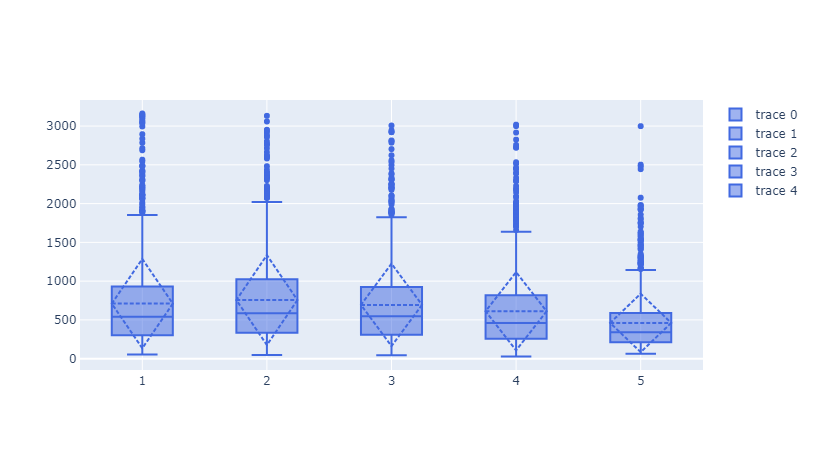

In [56]:
import plotly.graph_objects as go

# Create plot adding each figure individually so the color of each marker can be changed
fig = go.Figure()
fig.add_trace(go.Box(x=one_star_df['stars'], y=one_star_df['length'], marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=two_star_df['stars'], y=two_star_df['length'], marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=three_star_df['stars'], y=three_star_df['length'], marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=four_star_df['stars'], y=four_star_df['length'], marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=five_star_df['stars'], y=five_star_df['length'], marker_color='royalblue', boxmean='sd'))

fig.show()